# Analysis of Different Algo Strategies


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400

import statistics as st

data_csv = pd.read_csv("D:\\FRE\\Spring 2019\\High Frequency trading\\Week 1\\Assignment#1_Performance_track_records.csv")
stratergies = data_csv.columns.tolist()[3:]

prices = data_csv.iloc[:,2].values.tolist()
dates = [x.split()[0] for x in data_csv['DateTime']]
statergy = data_csv.iloc[:,3].values.tolist()
display(data_csv.set_index('DateTime').head(10))

,Asset,Price_Close,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
DateTime,,,,,,,,,,,,,,,,,,,,,
01/01/14 17:00,XAU/USD,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
01/02/14 17:00,XAU/USD,1224.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
01/03/14 17:00,XAU/USD,1237.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
01/06/14 17:00,XAU/USD,1238.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000899,0.000000,0.000000,0.000000
01/07/14 17:00,XAU/USD,1232.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.005002,-0.006569,0.000000,0.000000
01/08/14 17:00,XAU/USD,1226.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.002317,0.002318,0.000429,0.000000
01/09/14 17:00,XAU/USD,1228.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000393,-0.000759,-0.000756,-0.001087
01/10/14 17:00,XAU/USD,1247.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.006991,0.005529,-0.004349,-0.005630
01/13/14 17:00,XAU/USD,1253.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.002349,0.002350,0.002337,0.002339


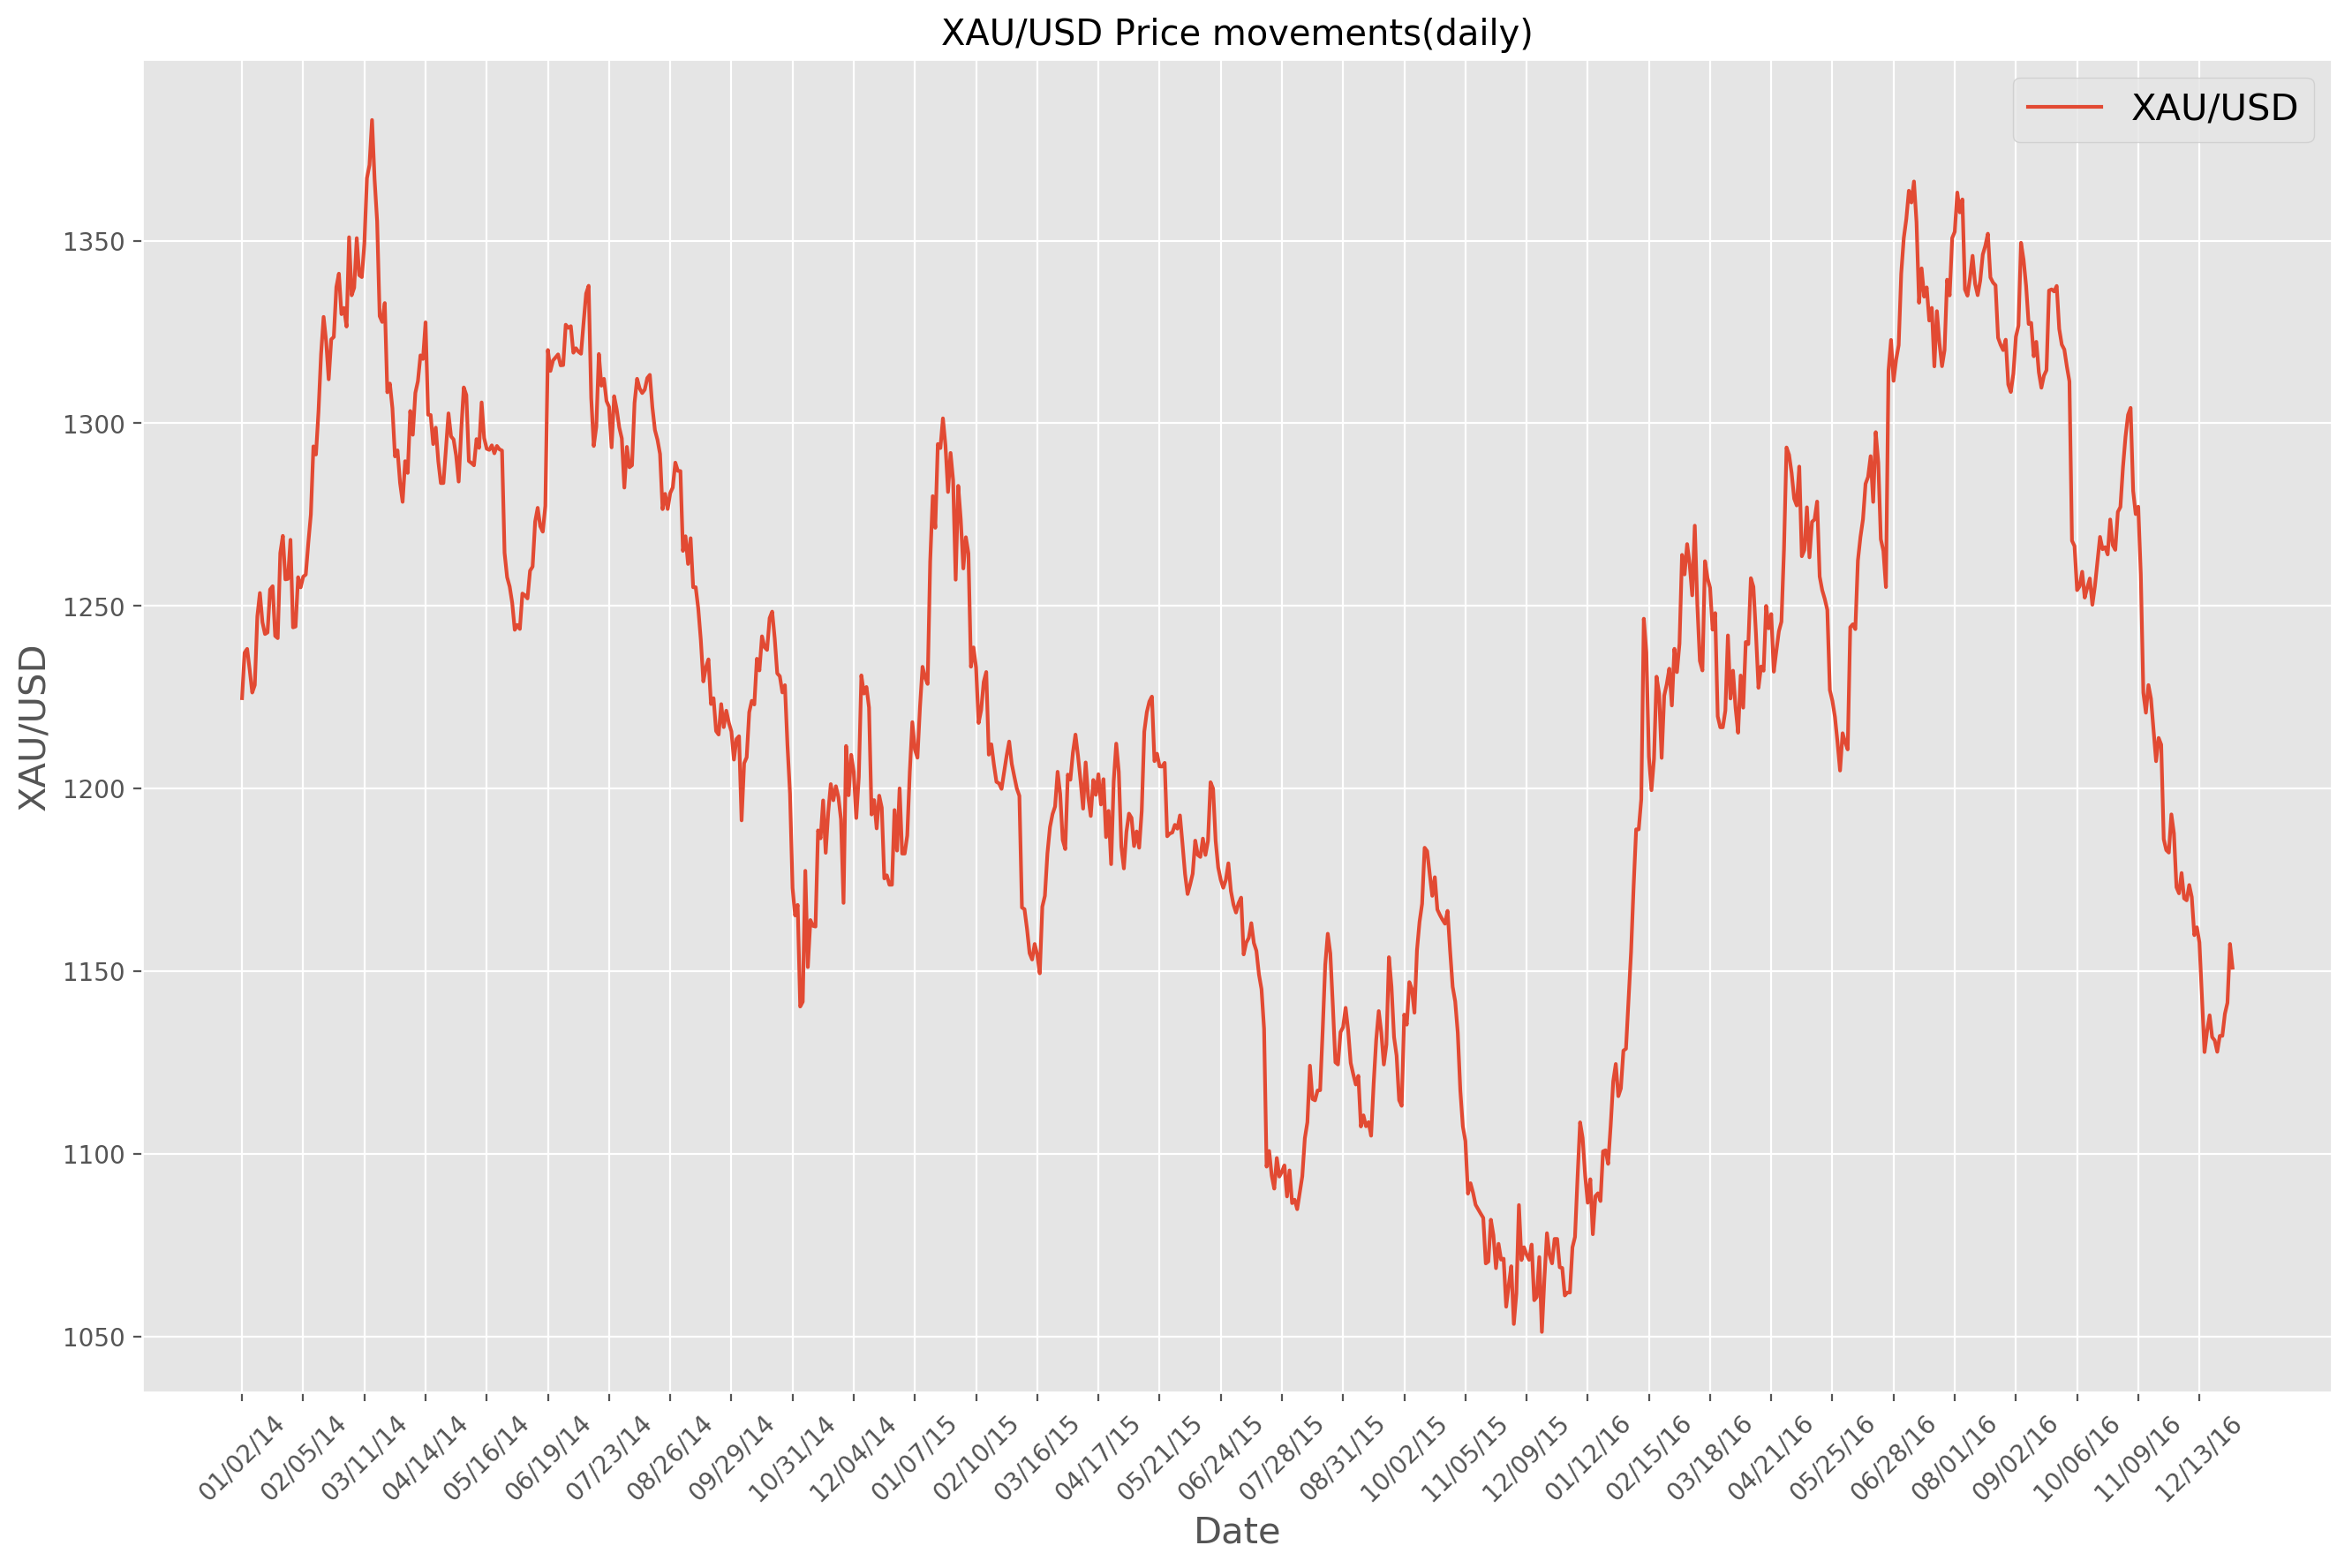

In [3]:
plt.figure()
plt.style.use('ggplot')
plt.title('XAU/USD Price movements(daily)')
plt.plot(dates[1:],prices[1:],label = 'XAU/USD')
plt.ylabel('XAU/USD',fontsize = 15)
plt.xlabel('Date',fontsize = 15)
plt.xticks(dates[1::24],rotation = 45)
plt.legend(fontsize = 15)
plt.show()

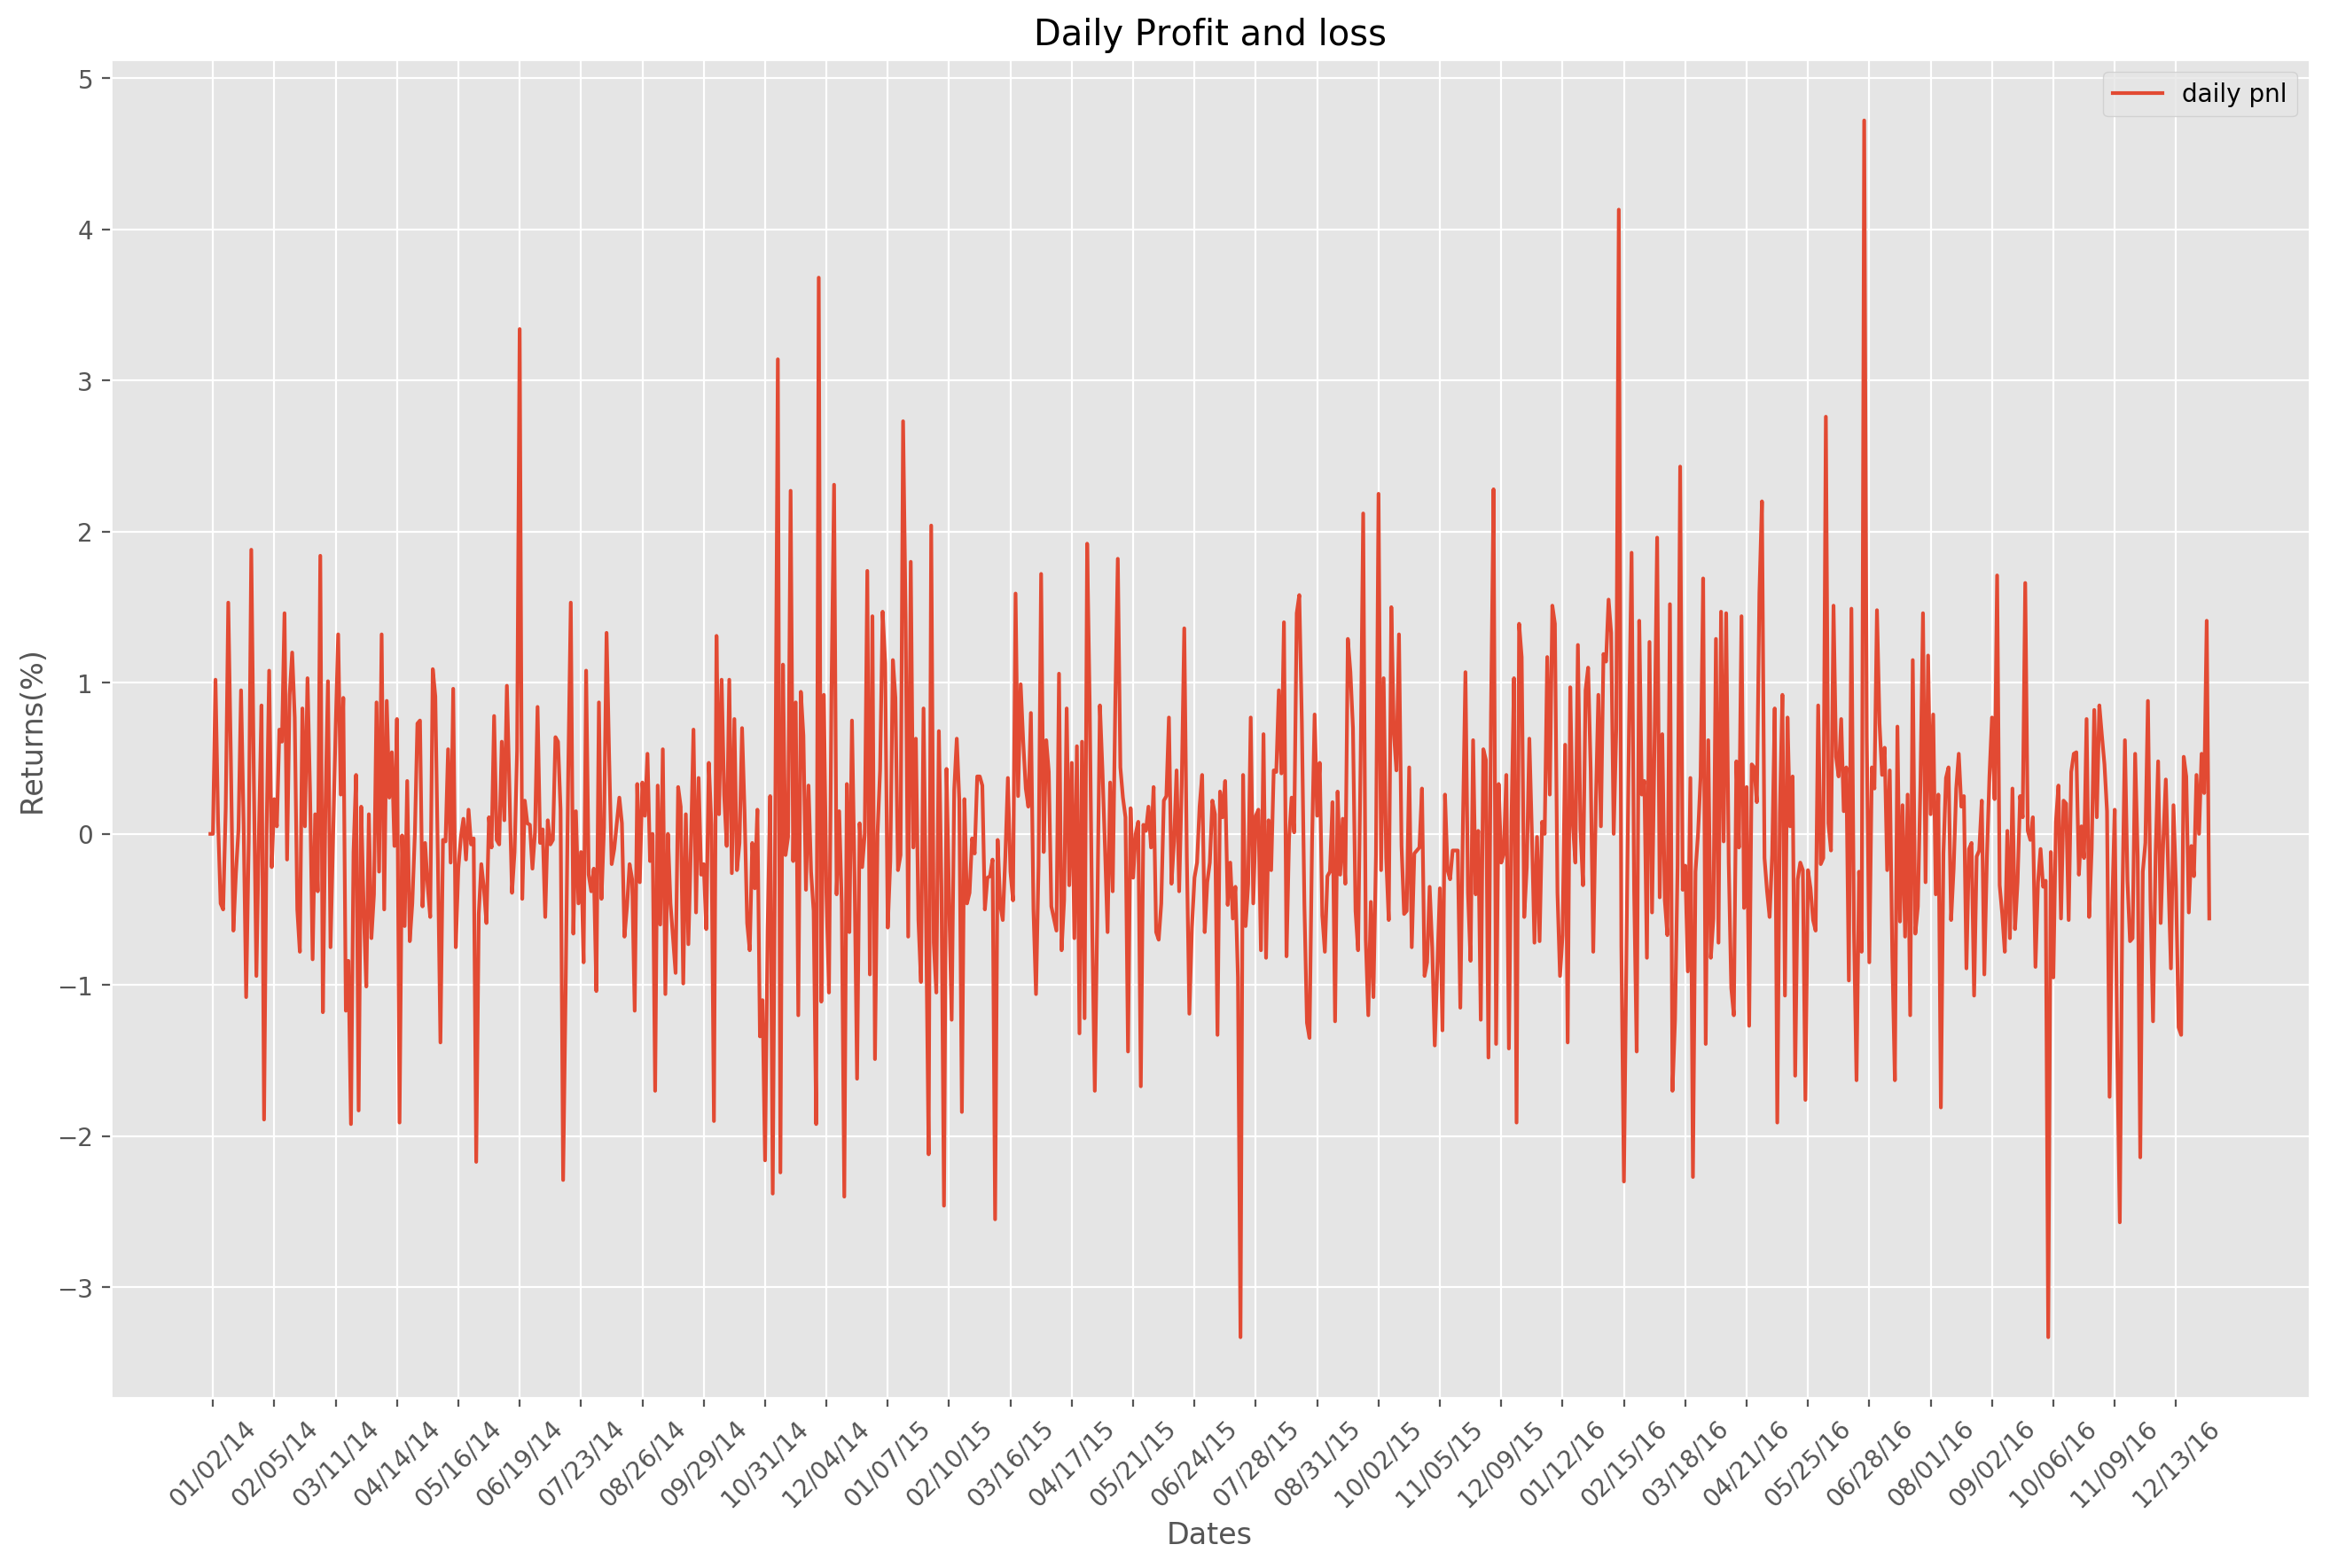

In [4]:
def daily_pnl(p):
    pnl = []
    for x in range(len(p)):
        if x == 0:
            yest = p[x]
            today = p[x]
            if yest == 0:
                pnl.append(0)
                continue
        else:
            if (x== len(p)):
                break;
            yest = p[x-1]
            today = p[x]
            if yest == 0:
                pnl.append(0)
                continue
            pnl.append(round((((today-yest)/yest)*100),2))
    return pnl
returns = daily_pnl(prices)
plt.figure()
plt.title('Daily Profit and loss')
plt.plot(dates,returns,label = 'daily pnl')
plt.xlabel('Dates')
plt.xticks(dates[1::24],rotation = 45)
plt.ylabel('Returns(%)')
plt.legend()
plt.show()

### Annualized Volatility of daily return

In [5]:
stdev = dict()
for i in range(len(stratergies)):
    stdev[stratergies[i]] = round((data_csv[stratergies[i]].std())*100,2)
    
stdev = pd.DataFrame(stdev.items(),columns = ['Strategies','Volatility(%)'])
stdev = stdev.set_index('Strategies')
display(stdev.sort_values(by = 'Volatility(%)').head(),stdev.sort_values(by = 'Volatility(%)').tail())

,Volatility(%)
Strategies,
03_09,0.33
03_12,0.34
03_11,0.34
03_05,0.34
03_06,0.34


,Volatility(%)
Strategies,
01_04,0.39
01_07,0.39
01_08,0.39
01_03,0.40
01_05,0.40


## Information ratio

In [6]:
def info_ratio():
    i_ratio = []
    for i in range(len(stratergies)):
        i_ratio.append(round((data_csv[stratergies[i]].mean()
                        /data_csv[stratergies[i]].std()),3))
    i_ratio = pd.DataFrame(i_ratio,columns = ['Info Ratio'],index= stratergies)
    return i_ratio

In [7]:
inf_out = info_ratio()
inf_out = inf_out.sort_values(by=['Info Ratio'],ascending = False)
print("\t****Top 5 Trading Strategies****")
display(inf_out.head(5))

	****Top 5 Trading Strategies****


,Info Ratio
03_12,0.066
03_04,0.065
01_12,0.064
03_11,0.063
03_06,0.063


## Sharpe Ratio

Taking risk-free rate as rf as 0.738% as my refinancing rate from T-Bill

In [8]:
def sharpe_ratio():
    s_ratio = []
    rf = (0.738/(365*3))/100  #annualized daily
    for i in range(len(stratergies)):
        s_ratio.append(round(((data_csv[stratergies[i]].mean()
                          - rf)/data_csv[stratergies[i]].std()),3))
    s_ratio = pd.DataFrame(s_ratio,columns=['Sharpe Ratio'],index=stratergies)
    return s_ratio

In [9]:
sh_out = sharpe_ratio()
sh_out = sh_out.sort_values(by=['Sharpe Ratio'],ascending = False)
#Top 5 Trading stratergy based on Sharpe ratio
print("\t\t****Top 5 Trading Strategies****")
display(sh_out.head())

		****Top 5 Trading Strategies****


,Sharpe Ratio
03_12,0.064
03_04,0.063
01_12,0.062
03_11,0.061
03_06,0.061


## Cumulative return

Using top 5 trading Strategies obtained from calculating Sharpe Ratio

In [10]:
cum_ret = dict()
for index in sh_out.head(5).index:
    cum_ret[index] = round(((data_csv[index]+1).cumprod()-1),4)
    
cum_ret = pd.DataFrame.from_dict(cum_ret)
print("\t***Cumulative return***")
display(cum_ret.tail(1))

	***Cumulative return***


,03_12,03_04,01_12,03_11,03_06
782,0.1836,0.1892,0.1987,0.1761,0.176


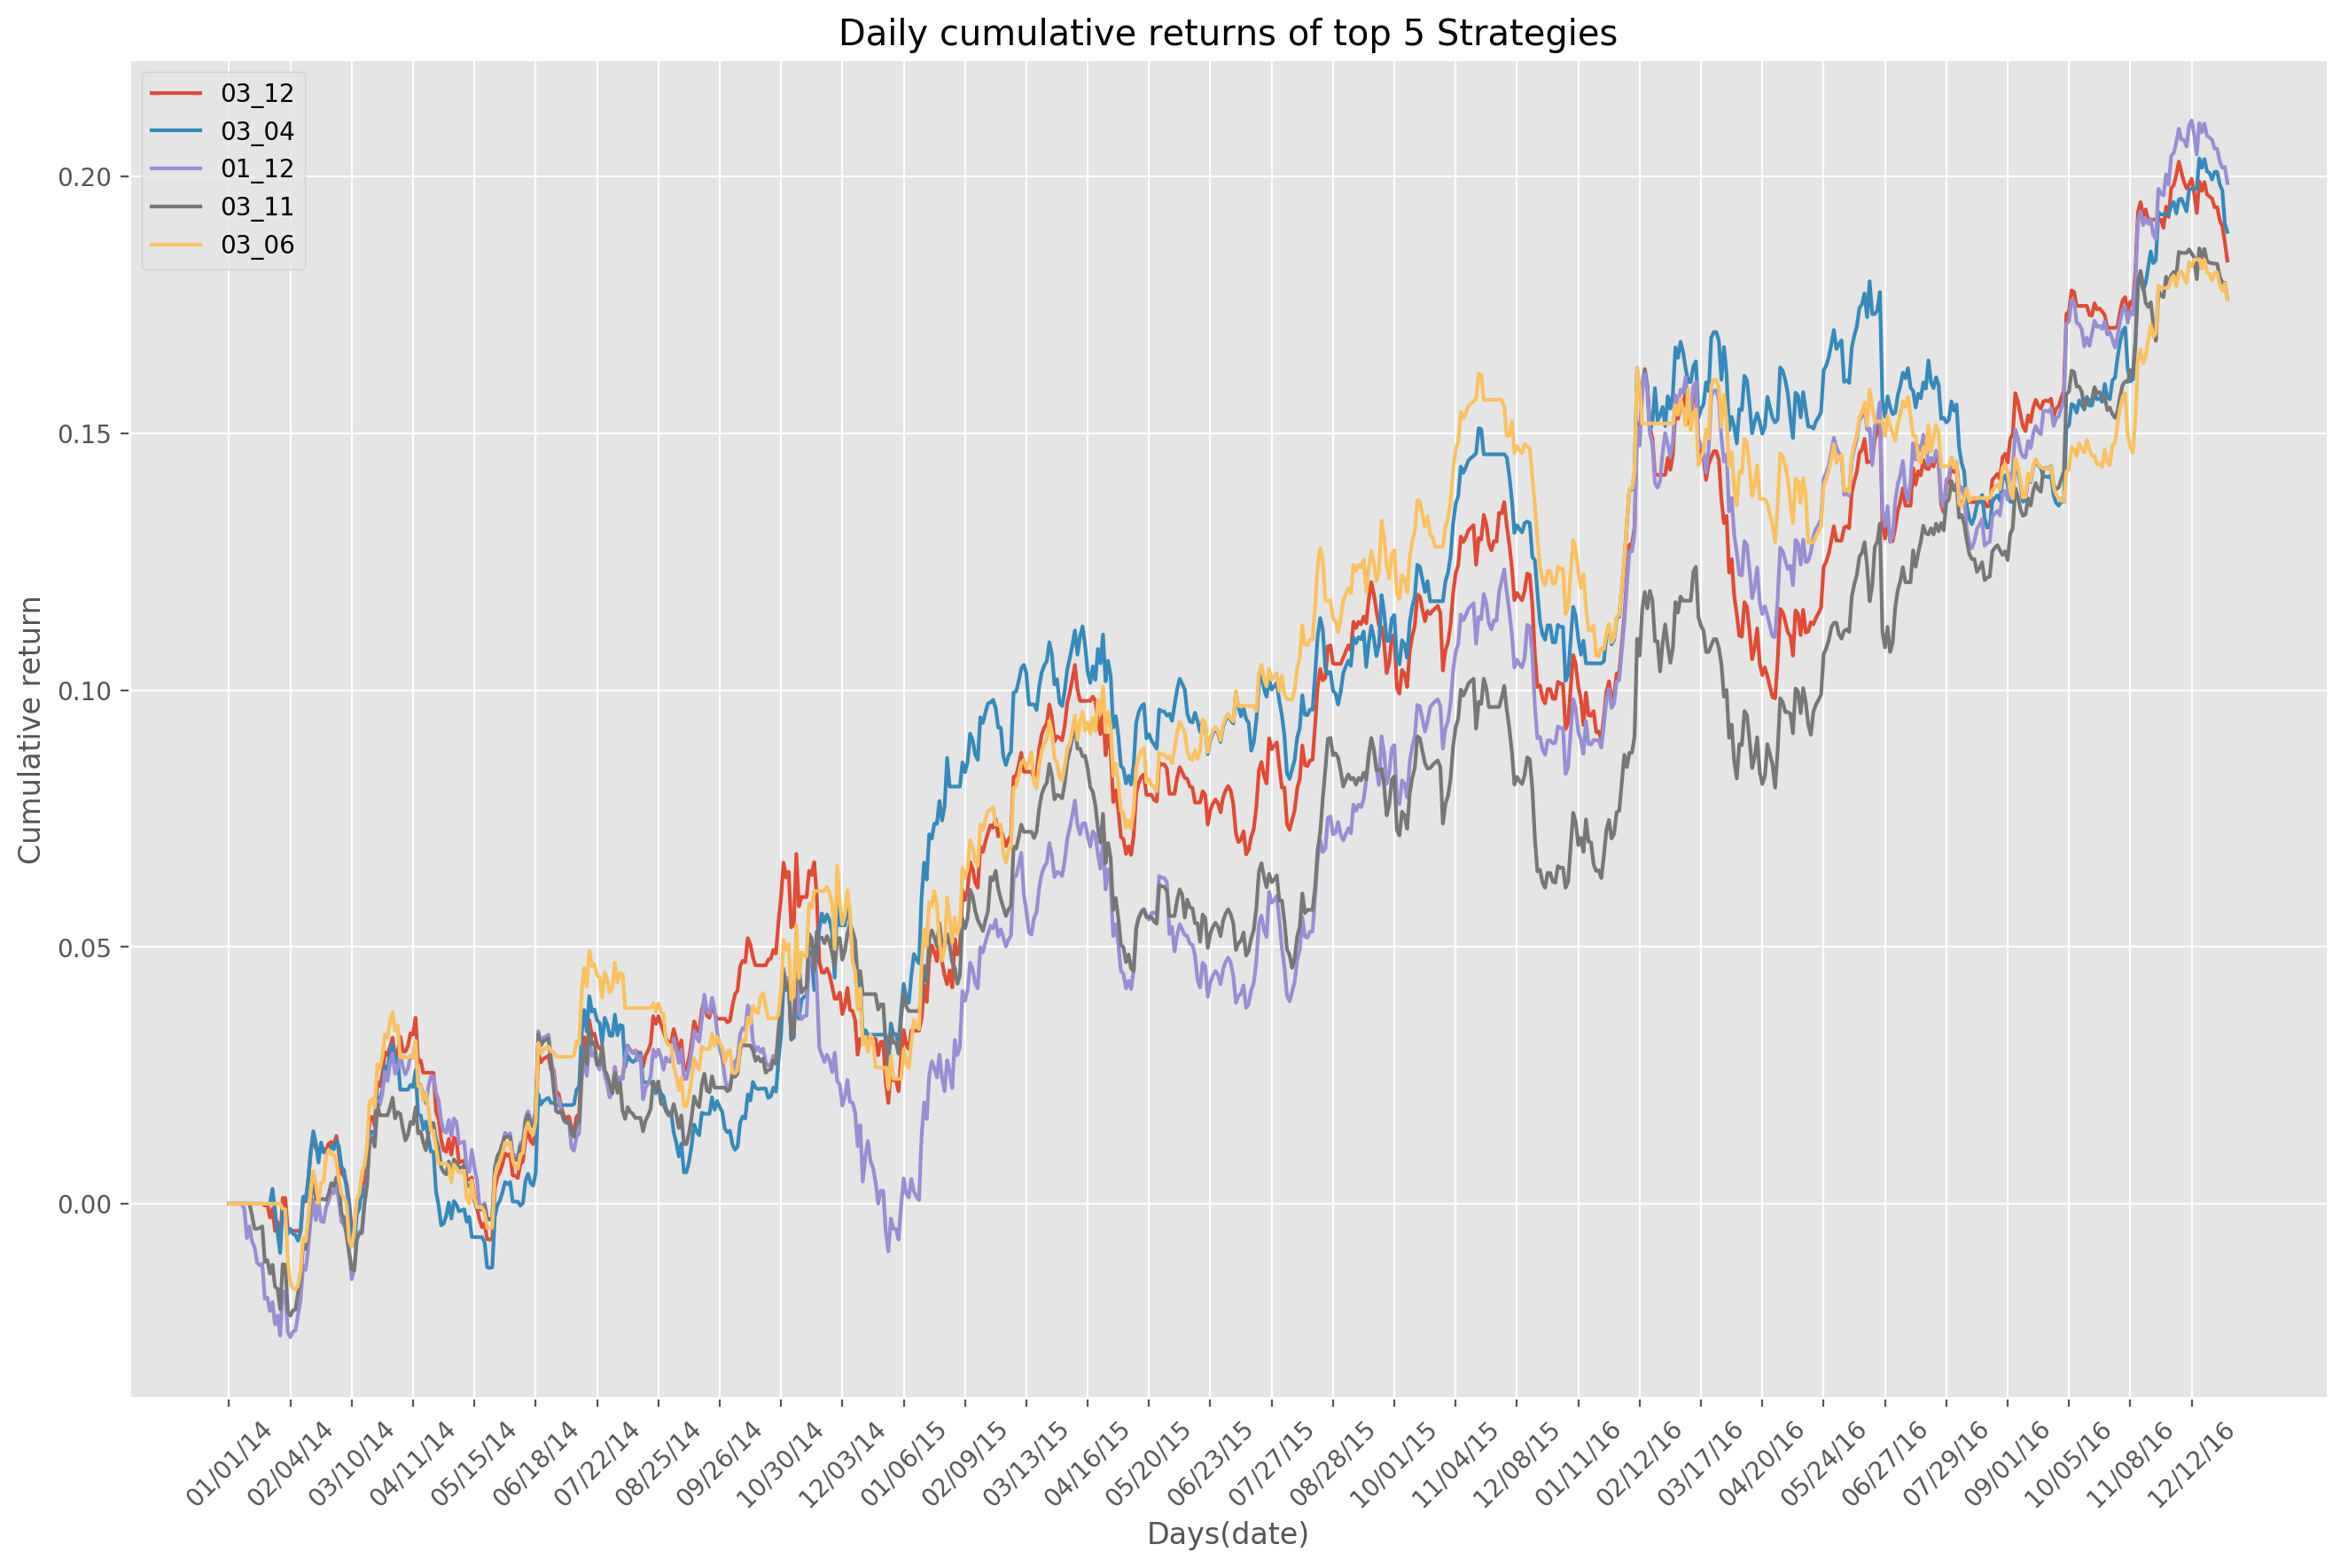

In [11]:
plt.title("Daily cumulative returns of top 5 Strategies")
for key in cum_ret.columns:
    plt.plot(dates,cum_ret[key],label = key)
plt.ylabel('Cumulative return')
plt.xlabel('Days(date)')
plt.xticks(dates[0::24],rotation = 45)
plt.legend()
plt.show()

## Yearly Return

In [12]:
yearly_ret = dict()

for year,i in [('Year_2014',dates.index('12/31/14')),
               ('Year_2015',dates.index('12/31/15')),
               ('Year_2016',dates.index('12/30/16'))]:
    if year == 'Year_2014':
        yearly_ret[year] = (cum_ret.loc[i].values)
        continue
    yearly_ret[year] = (cum_ret.loc[i].values)

yearly_ret = pd.DataFrame(yearly_ret,index = sh_out.head(5).index)
yearly_ret

,Year_2014,Year_2015,Year_2016
03_12,0.0240,0.1012,0.1836
03_04,0.0330,0.1123,0.1892
01_12,-0.0049,0.0926,0.1987
03_11,0.0313,0.0654,0.1761
03_06,0.0243,0.1236,0.1760


## %Winners And %Losers
This stat gives the overall percentage days a particular strategies  have positive PnL. Have taken Top 10 winners and losers because the values are repeating.

In [13]:
temp_df = pd.DataFrame( index = stratergies,
                       columns= ['# Of Winning days','# of Losing days', '%Winners','%Losers'] )

temp_df.index.name = 'Strategies'

for each_strat in stratergies:
    winners = 0            # Number of winners
    losers = 0             # Number of losers
    zeros = 0              # Number of Zeros
    for i in range(len(data_csv.index)):
        if (data_csv[each_strat][i] > 0):
            winners += 1
        elif (data_csv[each_strat][i] < 0):            
            losers += 1
        else:
            zeros +=1
    temp_df.loc[each_strat,'# Of Winning days'] = winners
    temp_df.loc[each_strat,'%Winners'] = str(round((winners / len(data_csv.index))*100,2))+ '%'
    temp_df.loc[each_strat,'# of Losing days'] = losers
    temp_df.loc[each_strat,'%Losers'] = str(round((losers / len(data_csv.index))*100,2)) + '%'
    
top_10Winners = temp_df.sort_values(by=['%Winners'],ascending = False).head(10)
top_10Losers = temp_df.sort_values(by=['%Losers'],ascending = False).head(10)
display(top_10Winners.loc[:,['# Of Winning days','%Winners']],top_10Losers.loc[:,['# of Losing days','%Losers']])

,# Of Winning days,%Winners
Strategies,,
01_01,397,50.7%
01_03,397,50.7%
01_10,397,50.7%
01_04,396,50.57%
01_06,395,50.45%
01_05,395,50.45%
01_12,395,50.45%
01_02,392,50.06%
01_09,391,49.94%


,# of Losing days,%Losers
Strategies,,
03_09,383,48.91%
01_09,383,48.91%
01_11,381,48.66%
01_08,378,48.28%
01_07,378,48.28%
01_02,378,48.28%
01_12,376,48.02%
01_10,376,48.02%
01_01,373,47.64%


## Max Drawdown


In [14]:
MaxDD_df = pd.DataFrame( index = stratergies,
                       columns= ['MaxDD'] )
MaxDD_df.index.name = 'Strategies'
for each_strat in stratergies: 
    mdd = 0      # Max Draw down
    peak = data_csv[each_strat][0]
    for i in range(len(data_csv.index)):
        if data_csv[each_strat][i] > peak:
            peak = data_csv[each_strat][i]
        if peak == 0:
            continue
        dd = (peak - data_csv[each_strat][i])/ peak
        if dd > mdd:
            mdd = dd
    MaxDD_df.loc[each_strat,'MaxDD'] = mdd

MaxDD_df = MaxDD_df.sort_values(by = 'MaxDD')
MaxDD_df.head()

,MaxDD
Strategies,
03_08,2.02951
03_06,2.03567
03_07,2.03883
03_05,2.03911
03_09,2.4536


## Heatmap between differrent strategies and daily Pnl
Here I have shown correlation between daily_pnl and return of different strategies

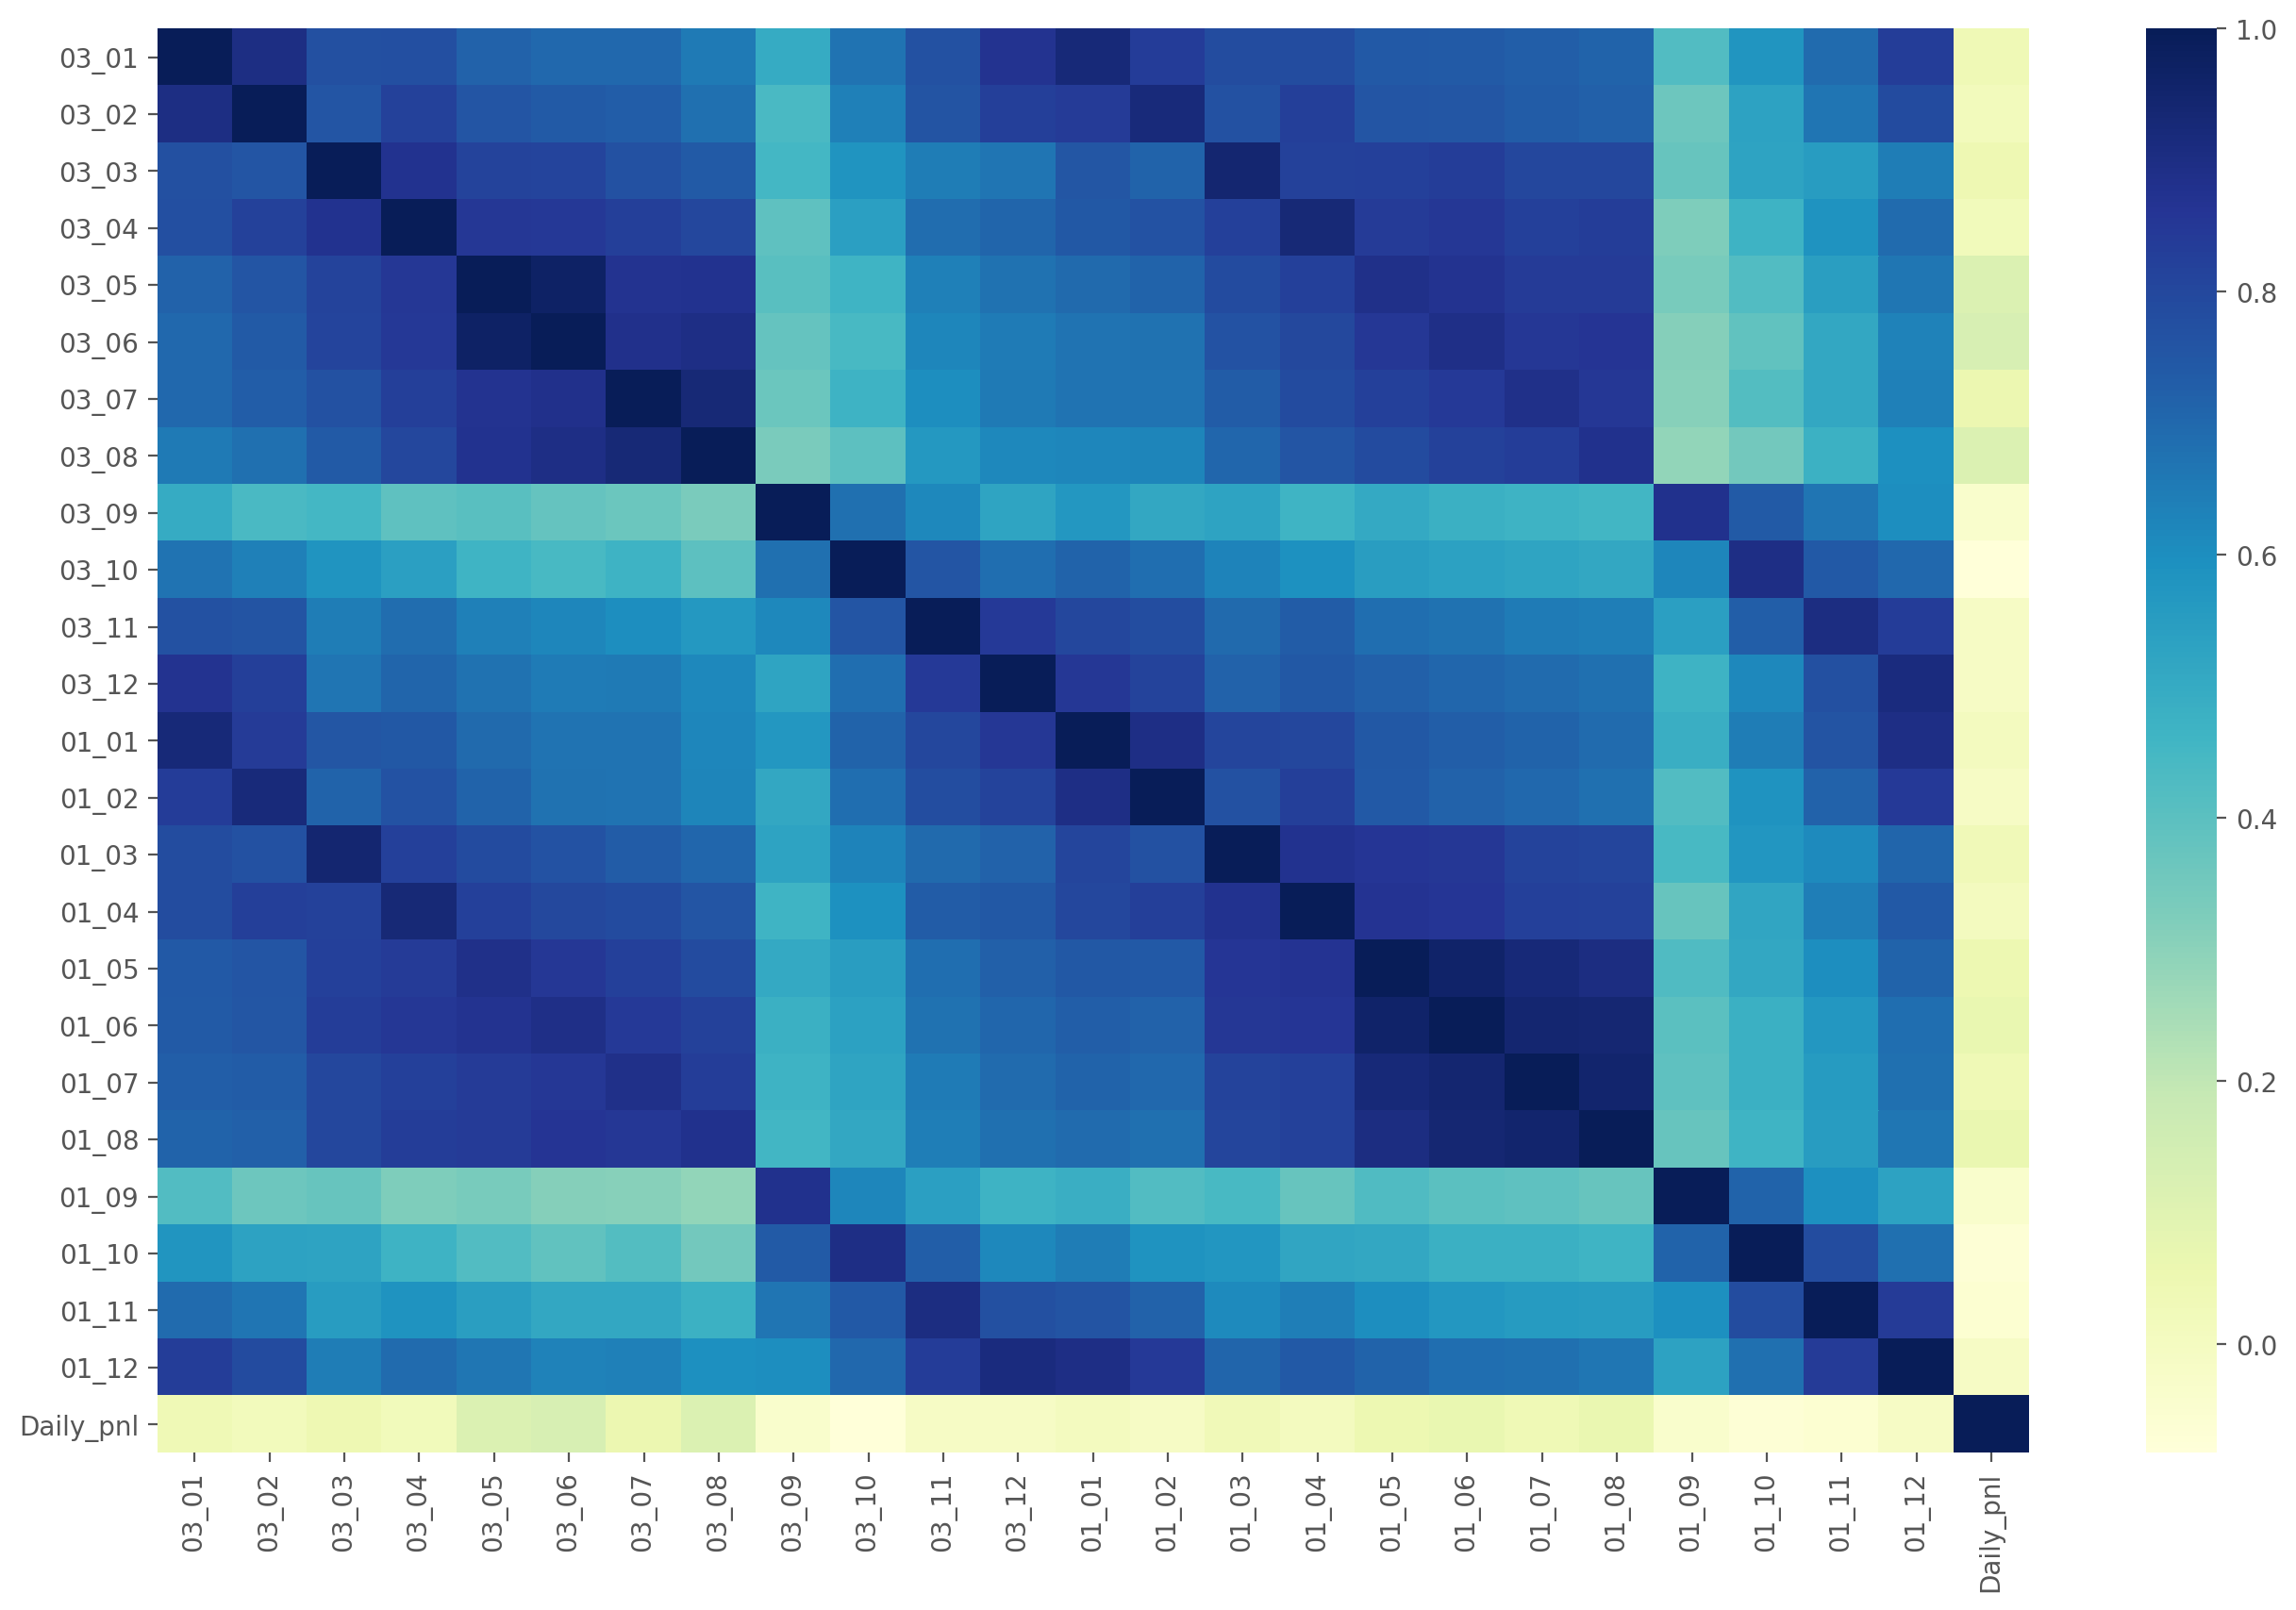

In [15]:
data_csv.loc[:,'Daily_pnl'] = daily_pnl(prices)
data_csv['Daily_pnl']
import seaborn as sns
corr = data_csv.iloc[1:,3:].corr()
sns.heatmap(corr,xticklabels=data_csv.iloc[1:,3:].columns.values,
            yticklabels= data_csv.iloc[1:,3:].columns.values,cmap="YlGnBu")

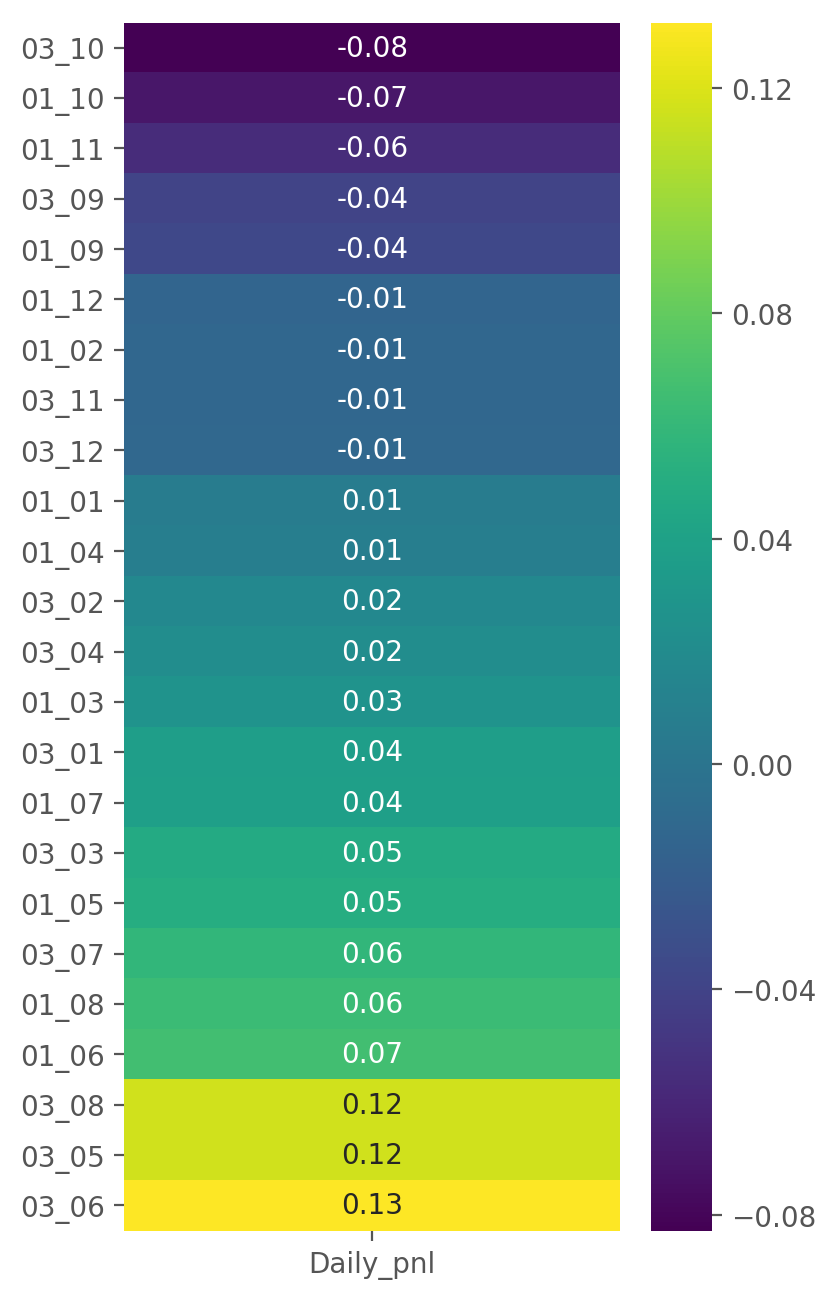

In [18]:
plt.figure(figsize= (4,8))
corr_daily = data_csv.iloc[1:,3:].corr()['Daily_pnl']
corr_daily = corr_daily.to_frame().sort_values(by = 'Daily_pnl')
df = corr_daily.iloc[:-1]                   #get  all values except the the last one
sns.heatmap(df, annot=True, fmt = '2.2f',cmap='viridis')
plt.show()